# Reto De Analítica de Datos - ICFES
> Daniel David Delgado Cervantes - 2182066

En el presente notebook se trabajarán los datos sobre todos los colegios y estudiantes del departamento del Vichada 
con el fin de comprender a una mayor profundidad los resultados obtenidos durante las pruebas ICFES del año 20XX. 
Se espera que a partir de esto se puedan identificar las diferentes fortalezas y debilidades con el fin de generar 
acciones que permitan unos mejores resultados de manera general en los diferentes colegios del departamento.


## 1. Configurando el ambiente

Lo primero a realizar está en la configuración del ambiente de programación con el fin de trabajar de la mejor manera. Así mismo, se cargarán los datos necesarios para poder realizar el análisis de estos.

### Importando las librerías
 
Para el desarrollo de este notebook, se utilizarán diferentes librerías las cuales nos ayudarán tanto en el manejo como al visualización de los datos recolectados.

In [78]:
# Importamos Numpy, Pandas, SciPy, matplotlib y SeaBorn
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


### Importando el DataSet

Ya con nuestras librerías, podremos importar el DataSet de los resultados del ICFES. Esto pude ser fácilmente realizado utilizando la librería `pandas`.

In [9]:
# Importamos el dataset del repositorio dado
URL = 'https://drive.google.com/uc?id=1w0brUz9iXZTO5mYd7bhihOlLO6k3Xfmg'
dataset = pd.read_csv(URL, sep=",", index_col=0)

dataset.head(6)

,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,...,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL
0,SUIZA,F,03/03/2003 12:00:00 AM,0,0,2,0,6,1,1,...,29,2,33,11,1,55.0,81,A1,244,49
1,VENEZUELA,M,05/10/2002 12:00:00 AM,0,0,3,1,6,1,1,...,45,2,49,55,2,33.0,6,A-,238,44
2,VENEZUELA,F,12/14/2003 12:00:00 AM,0,0,1,2,3,0,1,...,92,3,68,95,3,59.0,87,A2,325,94
3,VENEZUELA,M,04/12/2003 12:00:00 AM,0,0,0,3,6,1,1,...,43,2,43,38,2,47.0,58,A-,238,45
4,COLOMBIA,F,03/03/2004 12:00:00 AM,0,0,5,1,6,1,1,...,38,2,32,7,1,43.0,40,A-,202,19
5,COLOMBIA,M,12/14/2002 12:00:00 AM,0,0,0,4,9,1,0,...,19,1,40,27,1,35.0,12,A-,222,33


## 2. Análisis De Los Datos

### 2.1. Correlación entre los resultados

Ya teniendo el `DataSet` de los resultados del ICFES, al igual que nuestro ambiente de desarrollo establecido, ya podemos empezar a trabajar como tal en nuestro análisis sobre los datos recolectados.

Lo primero a hacer, y para dar una visión general de los datos, está en observar la correlación entre los datos que tenemos presentes en el dataset. Esto puede realizarse de manera relativamente sencilla usando los `heat maps` y `pair plots`. De manera inicial, nos interesa saber la correlación entre los puntajes obtenidos en el ICFES, siendo así, tomaremos las columas relacionadas con los puntajes.

In [10]:
colSel = ['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS', 'PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']

### 2.1.1. Heatmap General del DataSet

Lo primero a considerar está en lo que significan los `heatmaps`. En esencia, estos nos tratan de indicar que tan cercanos están relacionados los diferentes puntajes con las otras materias. A partir de esto, puede hacerse una inferencia del efecto de una materia sobre las otras. 

Por ejemplo, en el caso de ver una alta correlación entre 2 materias, querría decir que los puntajes en cada una de ellas son similares. Esto puede servir para identificar que competencias dentro del ICFES tienen un efecto sobre las otras.

Text(0.5, 1.0, 'Colombia: Heatmap Por Competencias')

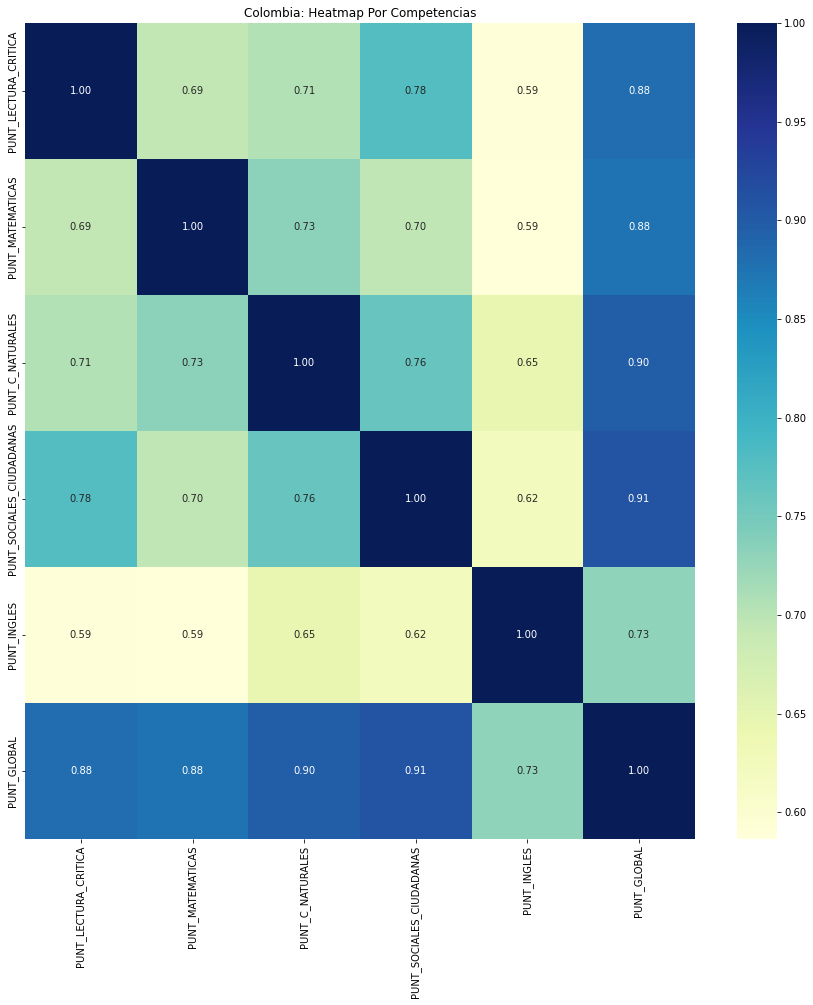

In [158]:
generalCorr = dataset[colSel].corr()
plt.subplots(figsize=(15,15))
sns.heatmap(generalCorr, annot=True, fmt=".2f", cmap="YlGnBu").set_title("Colombia: Heatmap Por Competencias")

### 2.1.2. PairPlot General del DataSet

A partir de esto podemos realizar la gráfica `PairPlot` con el fin de observar a más detalle la relación entre cada una de las columnas. Al igual que los `heatmaps` aquí se está buscando el establecer relaciones entre cada una de las competencias a nivel nacional. 

In [ ]:
sns.pairplot(data=dataset.loc[:, colSel])

En este caso, podemos ver la relación que se presenta entre cada una de los puntajes, percentiles, y el desempeño en cada una de las materias. Siendo así, se puede contemplar que hay una correlación entre cada uno de los puntajes. Sin embargo, con la apariencia que estos presentan en algunos casos en los cuales se ve una repartición relativamente uniforme, es posible considerar una la existencia de relaciones espurias.

### 2.1.3. Heatmap del Vichada

Veamos ahora, los resultados pero ahora sólo dentro del departamento. Lo primero por hacer está en tomar únicamente los resultados de los estudiantes residentes en Vichada. A partir del código de la región, 25 para este caso, podemos realizar la discriminación de los valores correspondientes.

In [150]:
datasetV = dataset[dataset["ESTU_DEPTO_RESIDE"] == 25]

Teniendo ahora los datos únicamente del Vichada, podemos realizar el mismo proceso que hicimos con todos los datos del país para realizar la visualización de los datos.

Text(0.5, 1.0, 'Vichada: Heatmap Por Competencias')

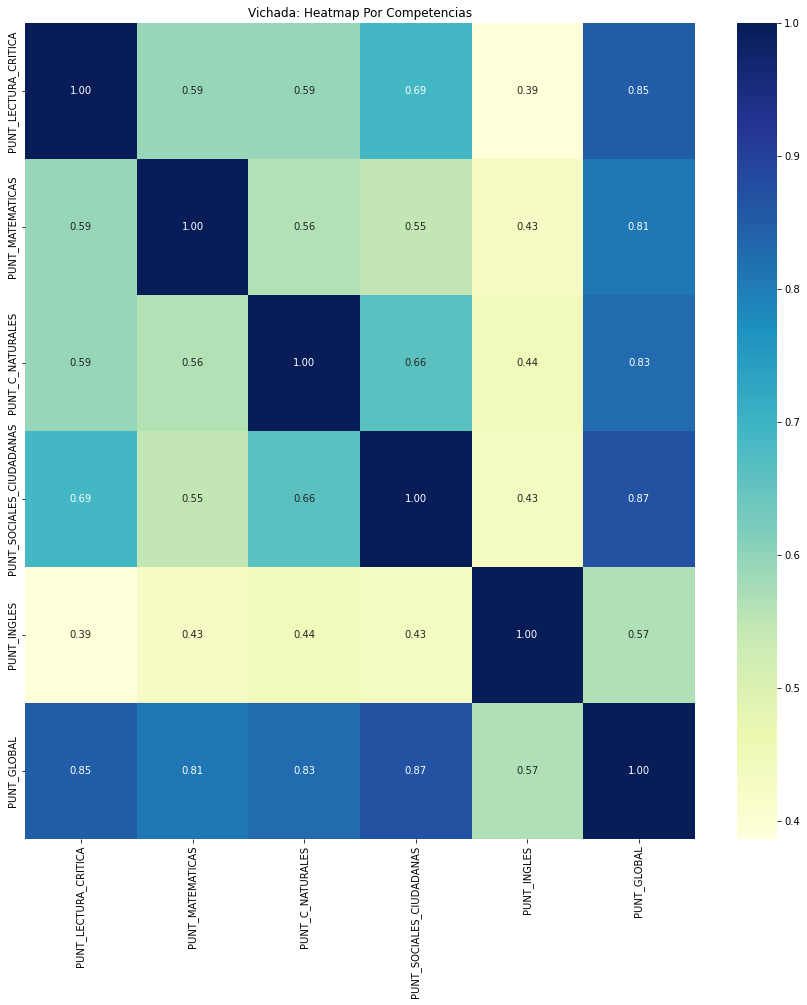

In [157]:
vichadaCorr = datasetV[colSel].corr()
plt.subplots(figsize=(15,15))
sns.heatmap(data=vichadaCorr, annot=True, fmt=".2f", cmap="YlGnBu").set_title("Vichada: Heatmap Por Competencias")

### 2.1.4. PairPlot del Vichada

De igual manera, queremos ver un poco más a detalle los resultados a trabajar. Estos es posible usando un `PairPlot`.

In [ ]:
sns.pairplot(data=datasetV.loc[:, colSel]).set_title("Vichada: PairPlot Por Competencias")

A partir de estos diagramas, podemos empezar a trabajar en las comparaciones entre el Vichada y el país. 

Lo primero a resaltar es la correlación entre la competencia de _Sociales y Ciudadanas_. Tanto a nivel nacional y departamental, esta es la que más presenta cercanía con los demás puntajes. De igual manera, y justo después de esta, le sigue, _Lectura Crítica_, _Matemáticas_, _Ciencias Naturales_ y finalmente _Inglés_. Esto, de una u otra manera, podría implicar que de hacer un mejor seguimiento en las áreas de las _Ciencias Sociales_, podrían presentarse mejorías en las demás materias.

Seguidamente, y lo otro a resaltar especialmente de los `heatmaps`, está en la correlación entre el puntaje global y el resto de las competencias. Es claro que, aunque sea poco, el Vichada presenta una peor correlación entre sus puntajes finales y las competencias al momento de ser comparado con el país. Esto, en esencia, indica la dispersión de entre las diferentes asignaturas trabajadas. Es decir, existe una mayor cantidad de casos en los que se destaca en alguna materia pero no en otra.

A partir de esto, es posible afirmar que, en términos generales, el Vichada se encuentra en una peor posición académica que el resto del país. Es necesario trabajar en la identificación de estrategias con el fin de mejorar los puntajes a nivel nacional.



## 2.2 Fortalezas y debilidades

### 2.2.1. Un diagnóstico general del país.

Uno de los objetivos del presente informe, estaba en la identificación de las diferentes fortalezas y debilidades dentro del país para comprar con el departamento. En este sentido, se realizó un enfoque hacia los ámbitos tecnológicos, específicamente el acceso a tanto dispositivos de computo y acceso a internet. De esto, se buscaba observar que efectos tienen estas categorías en cuanto a los resultados obtenidos en las pruebas ICFES.

<AxesSubplot:xlabel='PUNT_GLOBAL', ylabel='Density'>

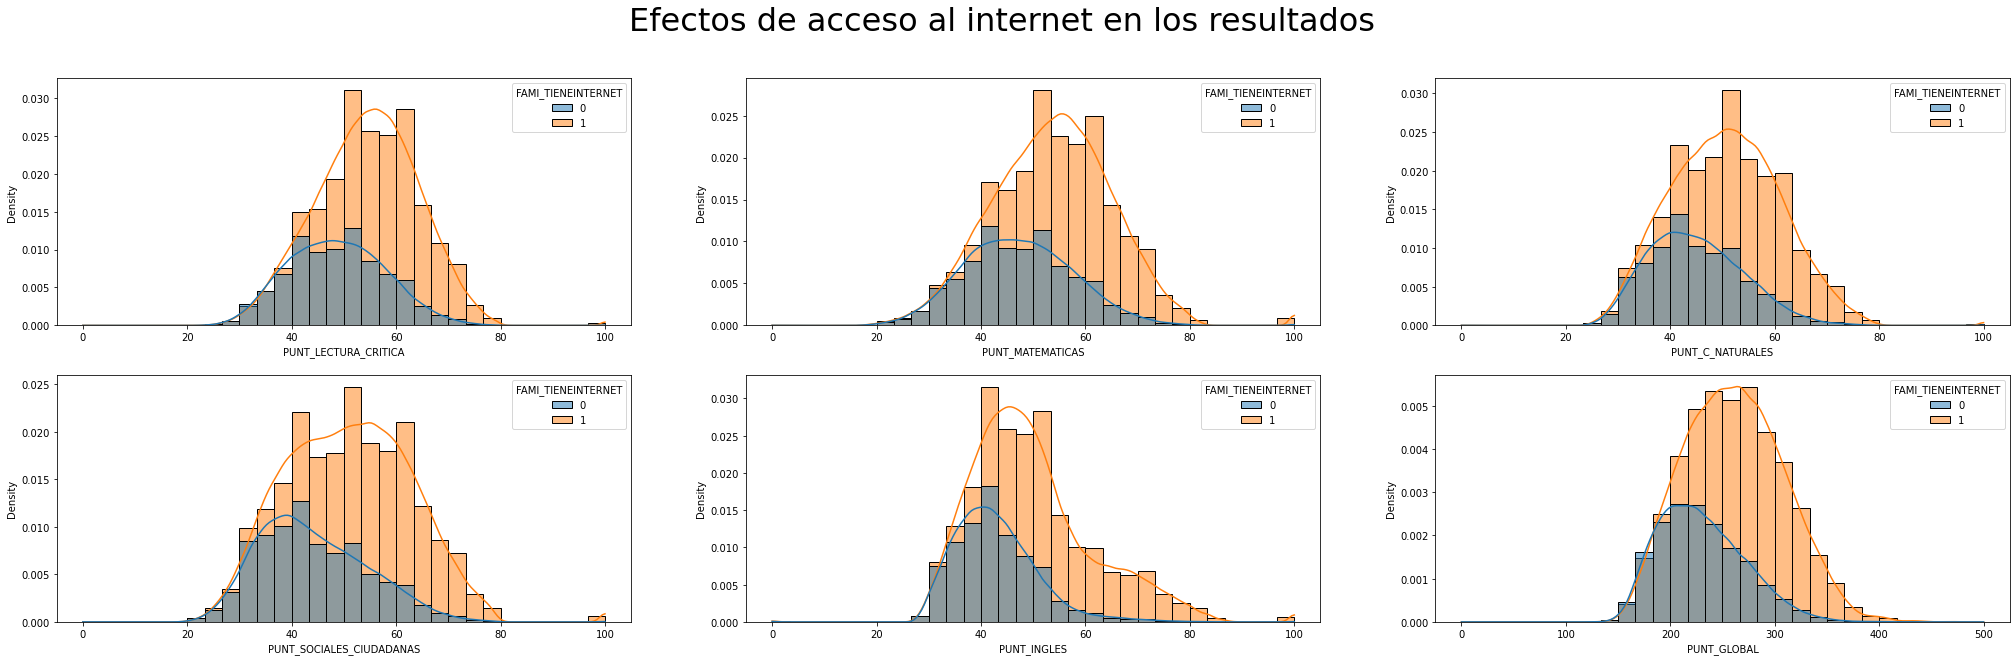

In [90]:
fig, axes = plt.subplots(2, 3, figsize=(35,10))
fig.suptitle("Efectos De Acceso Al Internet En Los Resultados", fontsize=32)
sns.histplot(ax=axes[0,0], x=dataset["PUNT_LECTURA_CRITICA"], palette="tab10", hue=dataset["FAMI_TIENEINTERNET"], stat="density", kde=True, bins=30)
sns.histplot(ax=axes[0,1], x=dataset["PUNT_MATEMATICAS"], palette="tab10", hue=dataset["FAMI_TIENEINTERNET"], stat="density", kde=True, bins=30)
sns.histplot(ax=axes[0,2], x=dataset["PUNT_C_NATURALES"], palette="tab10", hue=dataset["FAMI_TIENEINTERNET"], stat="density", kde=True, bins=30)
sns.histplot(ax=axes[1,0], x=dataset["PUNT_SOCIALES_CIUDADANAS"], palette="tab10", hue=dataset["FAMI_TIENEINTERNET"], stat="density", kde=True, bins=30)
sns.histplot(ax=axes[1,1], x=dataset["PUNT_INGLES"], palette="tab10", hue=dataset["FAMI_TIENEINTERNET"], stat="density", kde=True, bins=30)
sns.histplot(ax=axes[1,2], x=dataset["PUNT_GLOBAL"], palette="tab10", hue=dataset["FAMI_TIENEINTERNET"], stat="density", kde=True, bins=30)

En este caso, los presentes histogramas nos muestran, de manera evidente la existencia de una mayor cantidad de estudiantes que poseen acceso a internet en sus casas. De esto, y especialmente en competencias como _Sociales y Ciudadanas_ e _Inglés_. Los estudiantes poseen una mayor densidad hacia los puntajes más altos. Esta misma tendencia se ve a nivel del resto de las materias. Así mismo, en el caso de los puntajes globales, se presenta una mejor distribución hacia puntajes mayores de 250.

<AxesSubplot:xlabel='FAMI_TIENECOMPUTADOR', ylabel='PUNT_GLOBAL'>

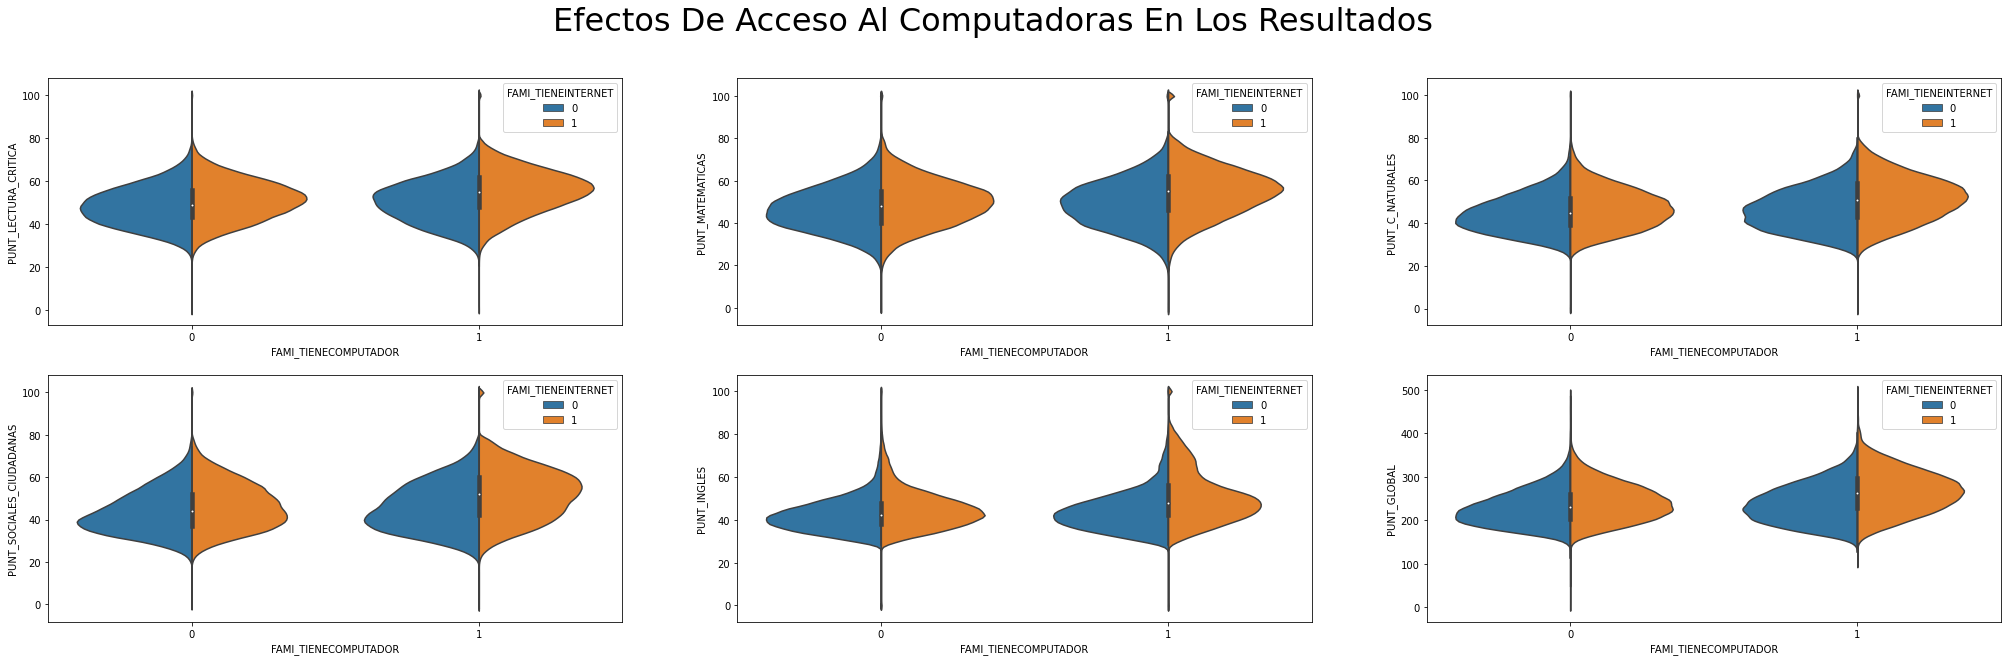

In [112]:
fig, axes = plt.subplots(2, 3, figsize=(35,10))
fig.suptitle("Efectos De Acceso Al Computadoras En Los Resultados", fontsize=32)

sns.violinplot(ax=axes[0,0], y=dataset["PUNT_LECTURA_CRITICA"], x=dataset["FAMI_TIENECOMPUTADOR"], hue=dataset["FAMI_TIENEINTERNET"], split=True)
sns.violinplot(ax=axes[0,1], y=dataset["PUNT_MATEMATICAS"], x=dataset["FAMI_TIENECOMPUTADOR"], hue=dataset["FAMI_TIENEINTERNET"], split=True)
sns.violinplot(ax=axes[0,2], y=dataset["PUNT_C_NATURALES"], x=dataset["FAMI_TIENECOMPUTADOR"], hue=dataset["FAMI_TIENEINTERNET"], split=True)
sns.violinplot(ax=axes[1,0], y=dataset["PUNT_SOCIALES_CIUDADANAS"], x=dataset["FAMI_TIENECOMPUTADOR"], hue=dataset["FAMI_TIENEINTERNET"], split=True)
sns.violinplot(ax=axes[1,1], y=dataset["PUNT_INGLES"], x=dataset["FAMI_TIENECOMPUTADOR"], hue=dataset["FAMI_TIENEINTERNET"], split=True)
sns.violinplot(ax=axes[1,2], y=dataset["PUNT_GLOBAL"], x=dataset["FAMI_TIENECOMPUTADOR"], hue=dataset["FAMI_TIENEINTERNET"], split=True)

Esto mismo es apreciable en cuanto agregamos el factor de acceso a equipos de computo. La distribución de densidad que apreciabamos en el histograma se repite e incluso es más evidente. De igual manera, el acceso al internet da la apariencia de un mejor desempeño a nivel general de todas las competencias del examen.

<AxesSubplot:xlabel='FAMI_ESTRATOVIVIENDA', ylabel='PERCENTIL_GLOBAL'>

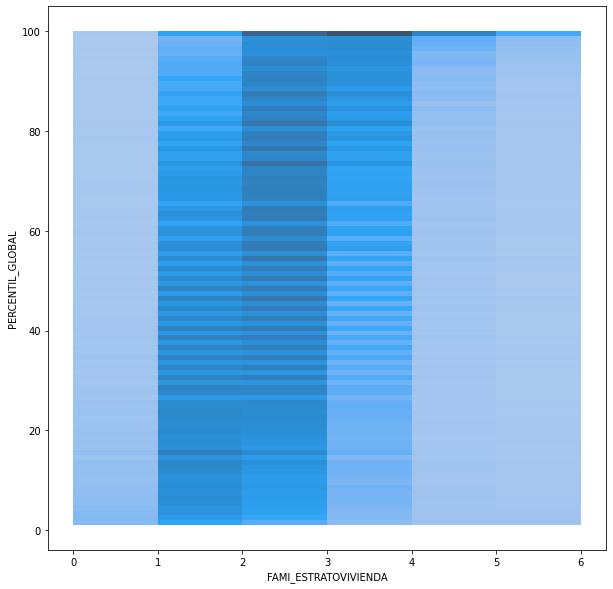

In [144]:
fig, axes = plt.subplots(1, 1, figsize=(10,10))
sns.histplot(data=dataset, x="FAMI_ESTRATOVIVIENDA", y="PERCENTIL_GLOBAL", binwidth=1)



A partir de este `heatmap` podemos observar el como este muestra un agrupamiento de resultados en cuanto a el estrato socio-económico de la familia del estudiantes que presenta las pruebas.

<AxesSubplot:xlabel='PUNT_GLOBAL', ylabel='Density'>

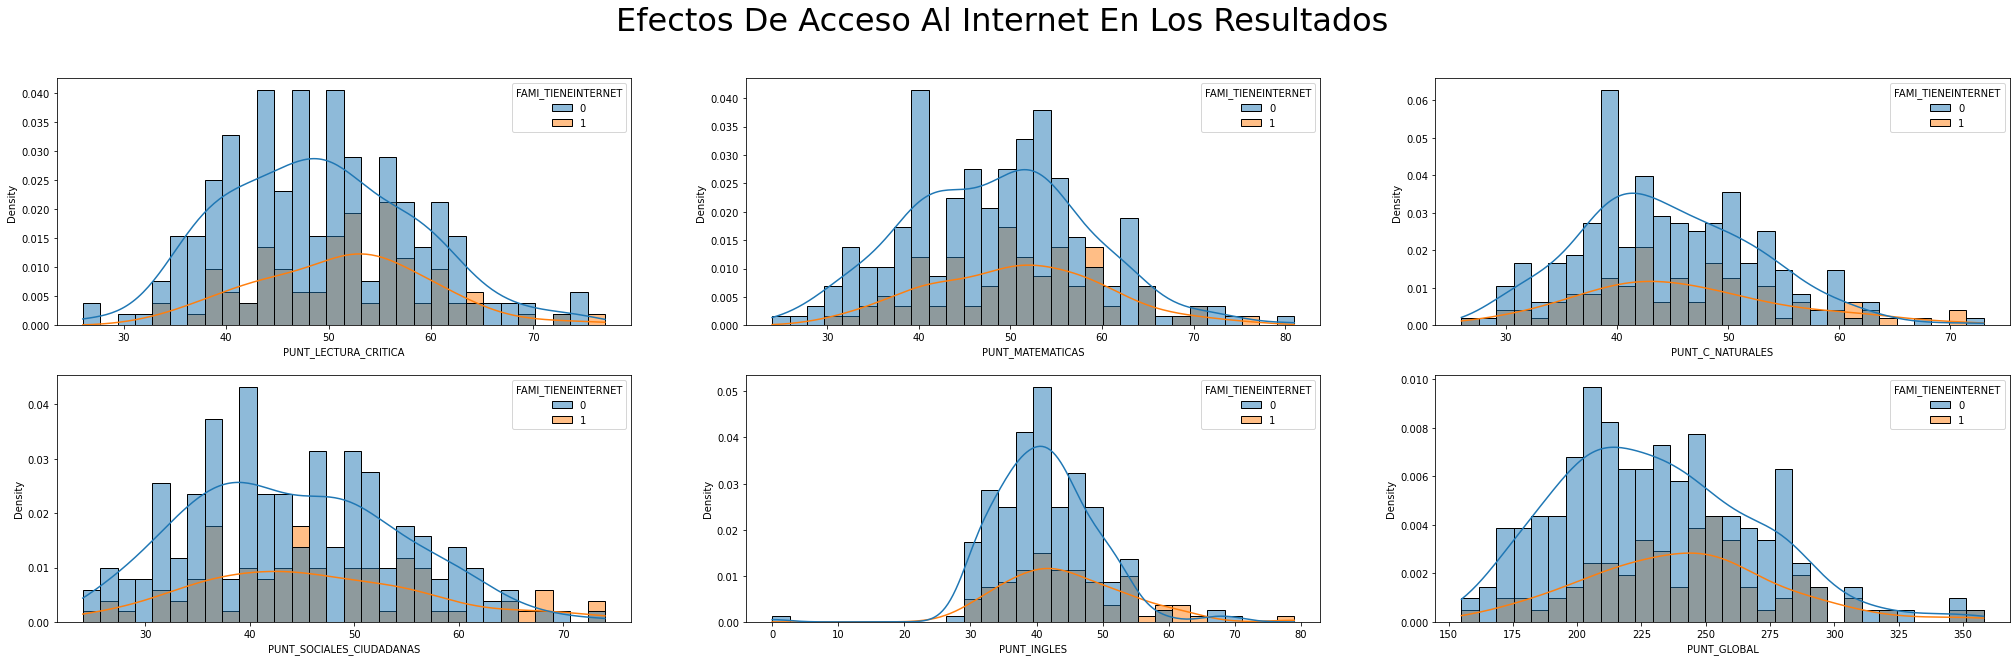

In [145]:
fig, axes = plt.subplots(2, 3, figsize=(35,10))
fig.suptitle("Efectos De Acceso Al Internet En Los Resultados", fontsize=32)
sns.histplot(ax=axes[0,0], x=datasetV["PUNT_LECTURA_CRITICA"], palette="tab10", hue=datasetV["FAMI_TIENEINTERNET"], stat="density", kde=True, bins=30)
sns.histplot(ax=axes[0,1], x=datasetV["PUNT_MATEMATICAS"], palette="tab10", hue=datasetV["FAMI_TIENEINTERNET"], stat="density", kde=True, bins=30)
sns.histplot(ax=axes[0,2], x=datasetV["PUNT_C_NATURALES"], palette="tab10", hue=datasetV["FAMI_TIENEINTERNET"], stat="density", kde=True, bins=30)
sns.histplot(ax=axes[1,0], x=datasetV["PUNT_SOCIALES_CIUDADANAS"], palette="tab10", hue=datasetV["FAMI_TIENEINTERNET"], stat="density", kde=True, bins=30)
sns.histplot(ax=axes[1,1], x=datasetV["PUNT_INGLES"], palette="tab10", hue=datasetV["FAMI_TIENEINTERNET"], stat="density", kde=True, bins=30)
sns.histplot(ax=axes[1,2], x=datasetV["PUNT_GLOBAL"], palette="tab10", hue=datasetV["FAMI_TIENEINTERNET"], stat="density", kde=True, bins=30)

Una conclusión diferente podemos sacar de estos histogramas en cuanto el efecto del acceso a internet en los resultados obtenidos en las pruebas. En este caso, se aparenta que el tener o no tener acceso a internet en el Vichada, no tiene una gran relevancia para los resultados obtenidos durante la prueba.

<AxesSubplot:xlabel='FAMI_TIENECOMPUTADOR', ylabel='PUNT_GLOBAL'>

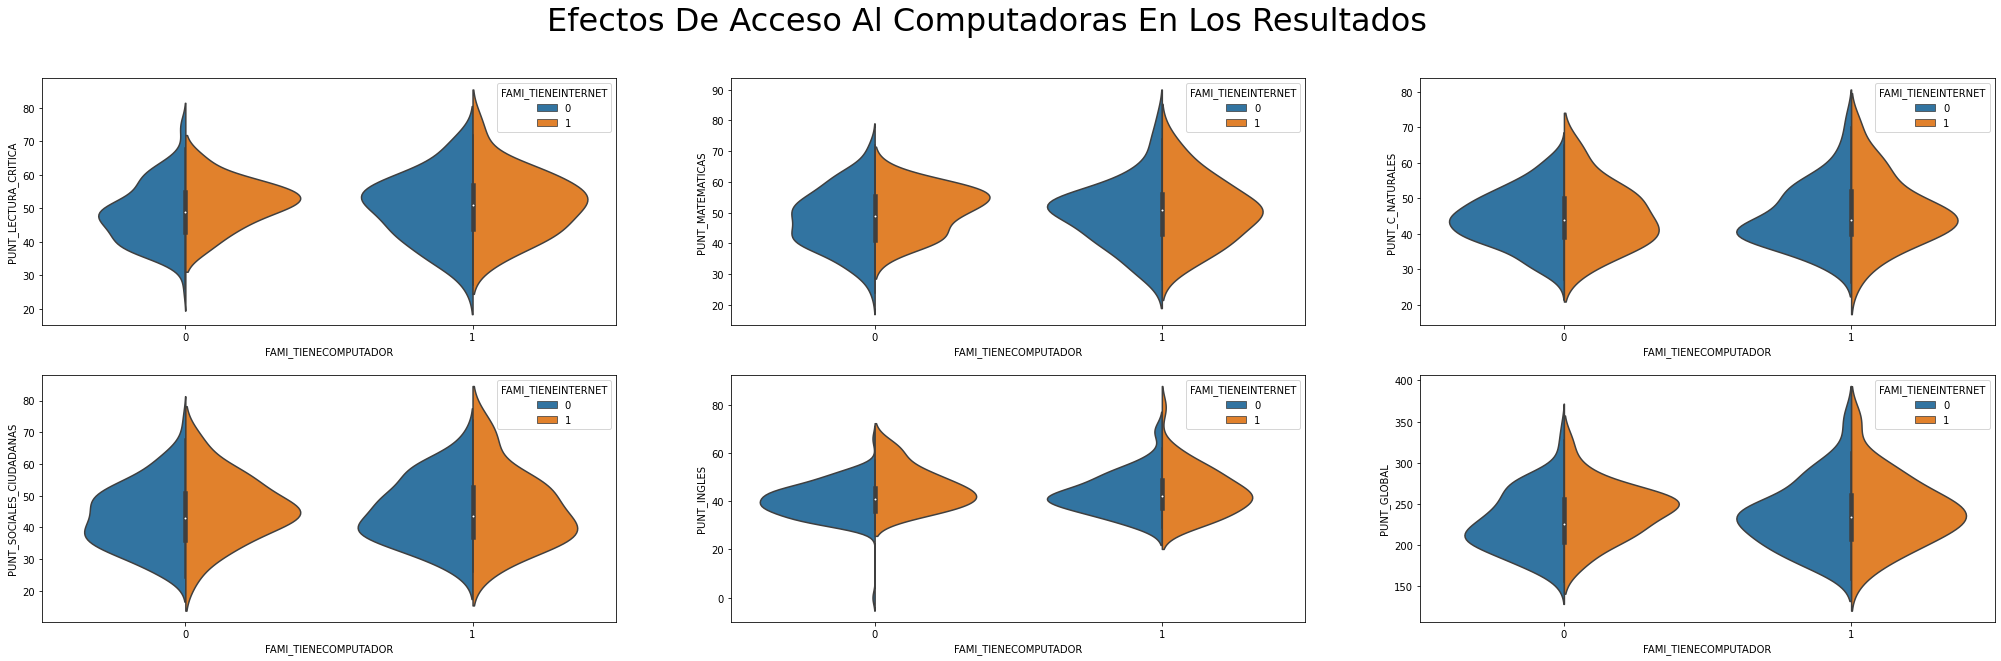

In [148]:
fig, axes = plt.subplots(2, 3, figsize=(35,10))
fig.suptitle("Efectos De Acceso Al Computadoras En Los Resultados", fontsize=32)

sns.violinplot(ax=axes[0,0], y=datasetV["PUNT_LECTURA_CRITICA"], x=datasetV["FAMI_TIENECOMPUTADOR"], hue=datasetV["FAMI_TIENEINTERNET"], split=True)
sns.violinplot(ax=axes[0,1], y=datasetV["PUNT_MATEMATICAS"], x=datasetV["FAMI_TIENECOMPUTADOR"], hue=datasetV["FAMI_TIENEINTERNET"], split=True)
sns.violinplot(ax=axes[0,2], y=datasetV["PUNT_C_NATURALES"], x=datasetV["FAMI_TIENECOMPUTADOR"], hue=datasetV["FAMI_TIENEINTERNET"], split=True)
sns.violinplot(ax=axes[1,0], y=datasetV["PUNT_SOCIALES_CIUDADANAS"], x=datasetV["FAMI_TIENECOMPUTADOR"], hue=datasetV["FAMI_TIENEINTERNET"], split=True)
sns.violinplot(ax=axes[1,1], y=datasetV["PUNT_INGLES"], x=datasetV["FAMI_TIENECOMPUTADOR"], hue=datasetV["FAMI_TIENEINTERNET"], split=True)
sns.violinplot(ax=axes[1,2], y=datasetV["PUNT_GLOBAL"], x=datas
etV["FAMI_TIENECOMPUTADOR"], hue=datasetV["FAMI_TIENEINTERNET"], split=True)

Esta misma inferencia se reafirma en el caso de añadir el acceso a equipos de computo al examen. Aunque en la competencia de inglés presenta un mejor desempeño, de manera general, no aparenta tener mayor efecto que una centralización de los datos sobre los puntajes intermedios de la prueba.

<AxesSubplot:xlabel='FAMI_ESTRATOVIVIENDA', ylabel='PERCENTIL_GLOBAL'>

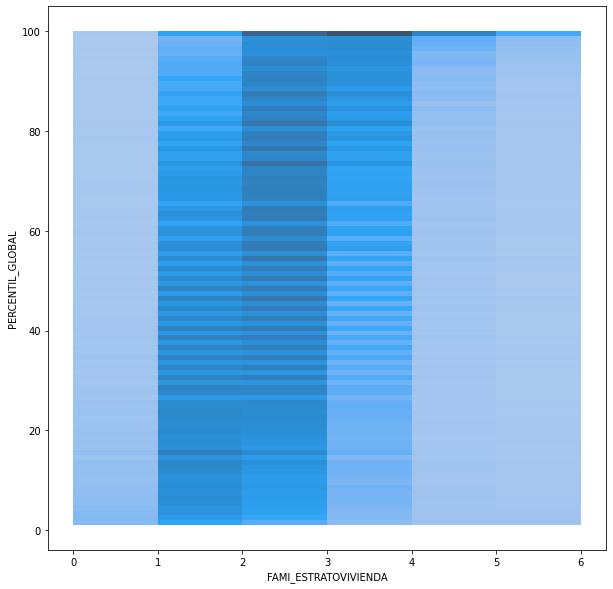

In [149]:
fig, axes = plt.subplots(1, 1, figsize=(10,10))
sns.histplot(data=dataset, x="FAMI_ESTRATOVIVIENDA", y="PERCENTIL_GLOBAL", binwidth=1)

### 3. Conclusiones

Después del presente análisis de los datos, se ha de resaltar la deficiencia en las pruebas saber del departamento respecto al resto del país. Se ha de trabajar en búsqueda de técnicas de enseñanza para un mejor aprovechamiento de la tecnología en las casas con fines académicos con el fin de aumentar los resultados de las pruebas saber. De igual manera, la extensión del acceso de los recursos tecnológicos a la región.